In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD clean data before applying LabelEncoder
df = pd.read_csv('./data/df_clean.csv',index_col =0).sort_values(by='SoldTime')
pd.to_datetime(df.SoldTime)
df.set_index(pd.DatetimeIndex(df['SoldTime']),inplace=True)
df = df.drop('SoldTime',axis=1)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SoldTime,,,,,,,,,,,,,,,,,,,,,
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,265,0,0,0,0,648,0,1,2006,181000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,319,0,0,0,0,0,1,2006,136500
2006-01-01,RL,Pave,0,IR2,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,...,192,267,0,0,0,0,0,1,2006,423000
2006-01-01,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,468,81,0,0,0,0,0,1,2006,205000
2006-01-01,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,160,24,0,0,0,0,0,1,2006,260000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2006-01-01 to 2010-07-01
Data columns (total 80 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
B

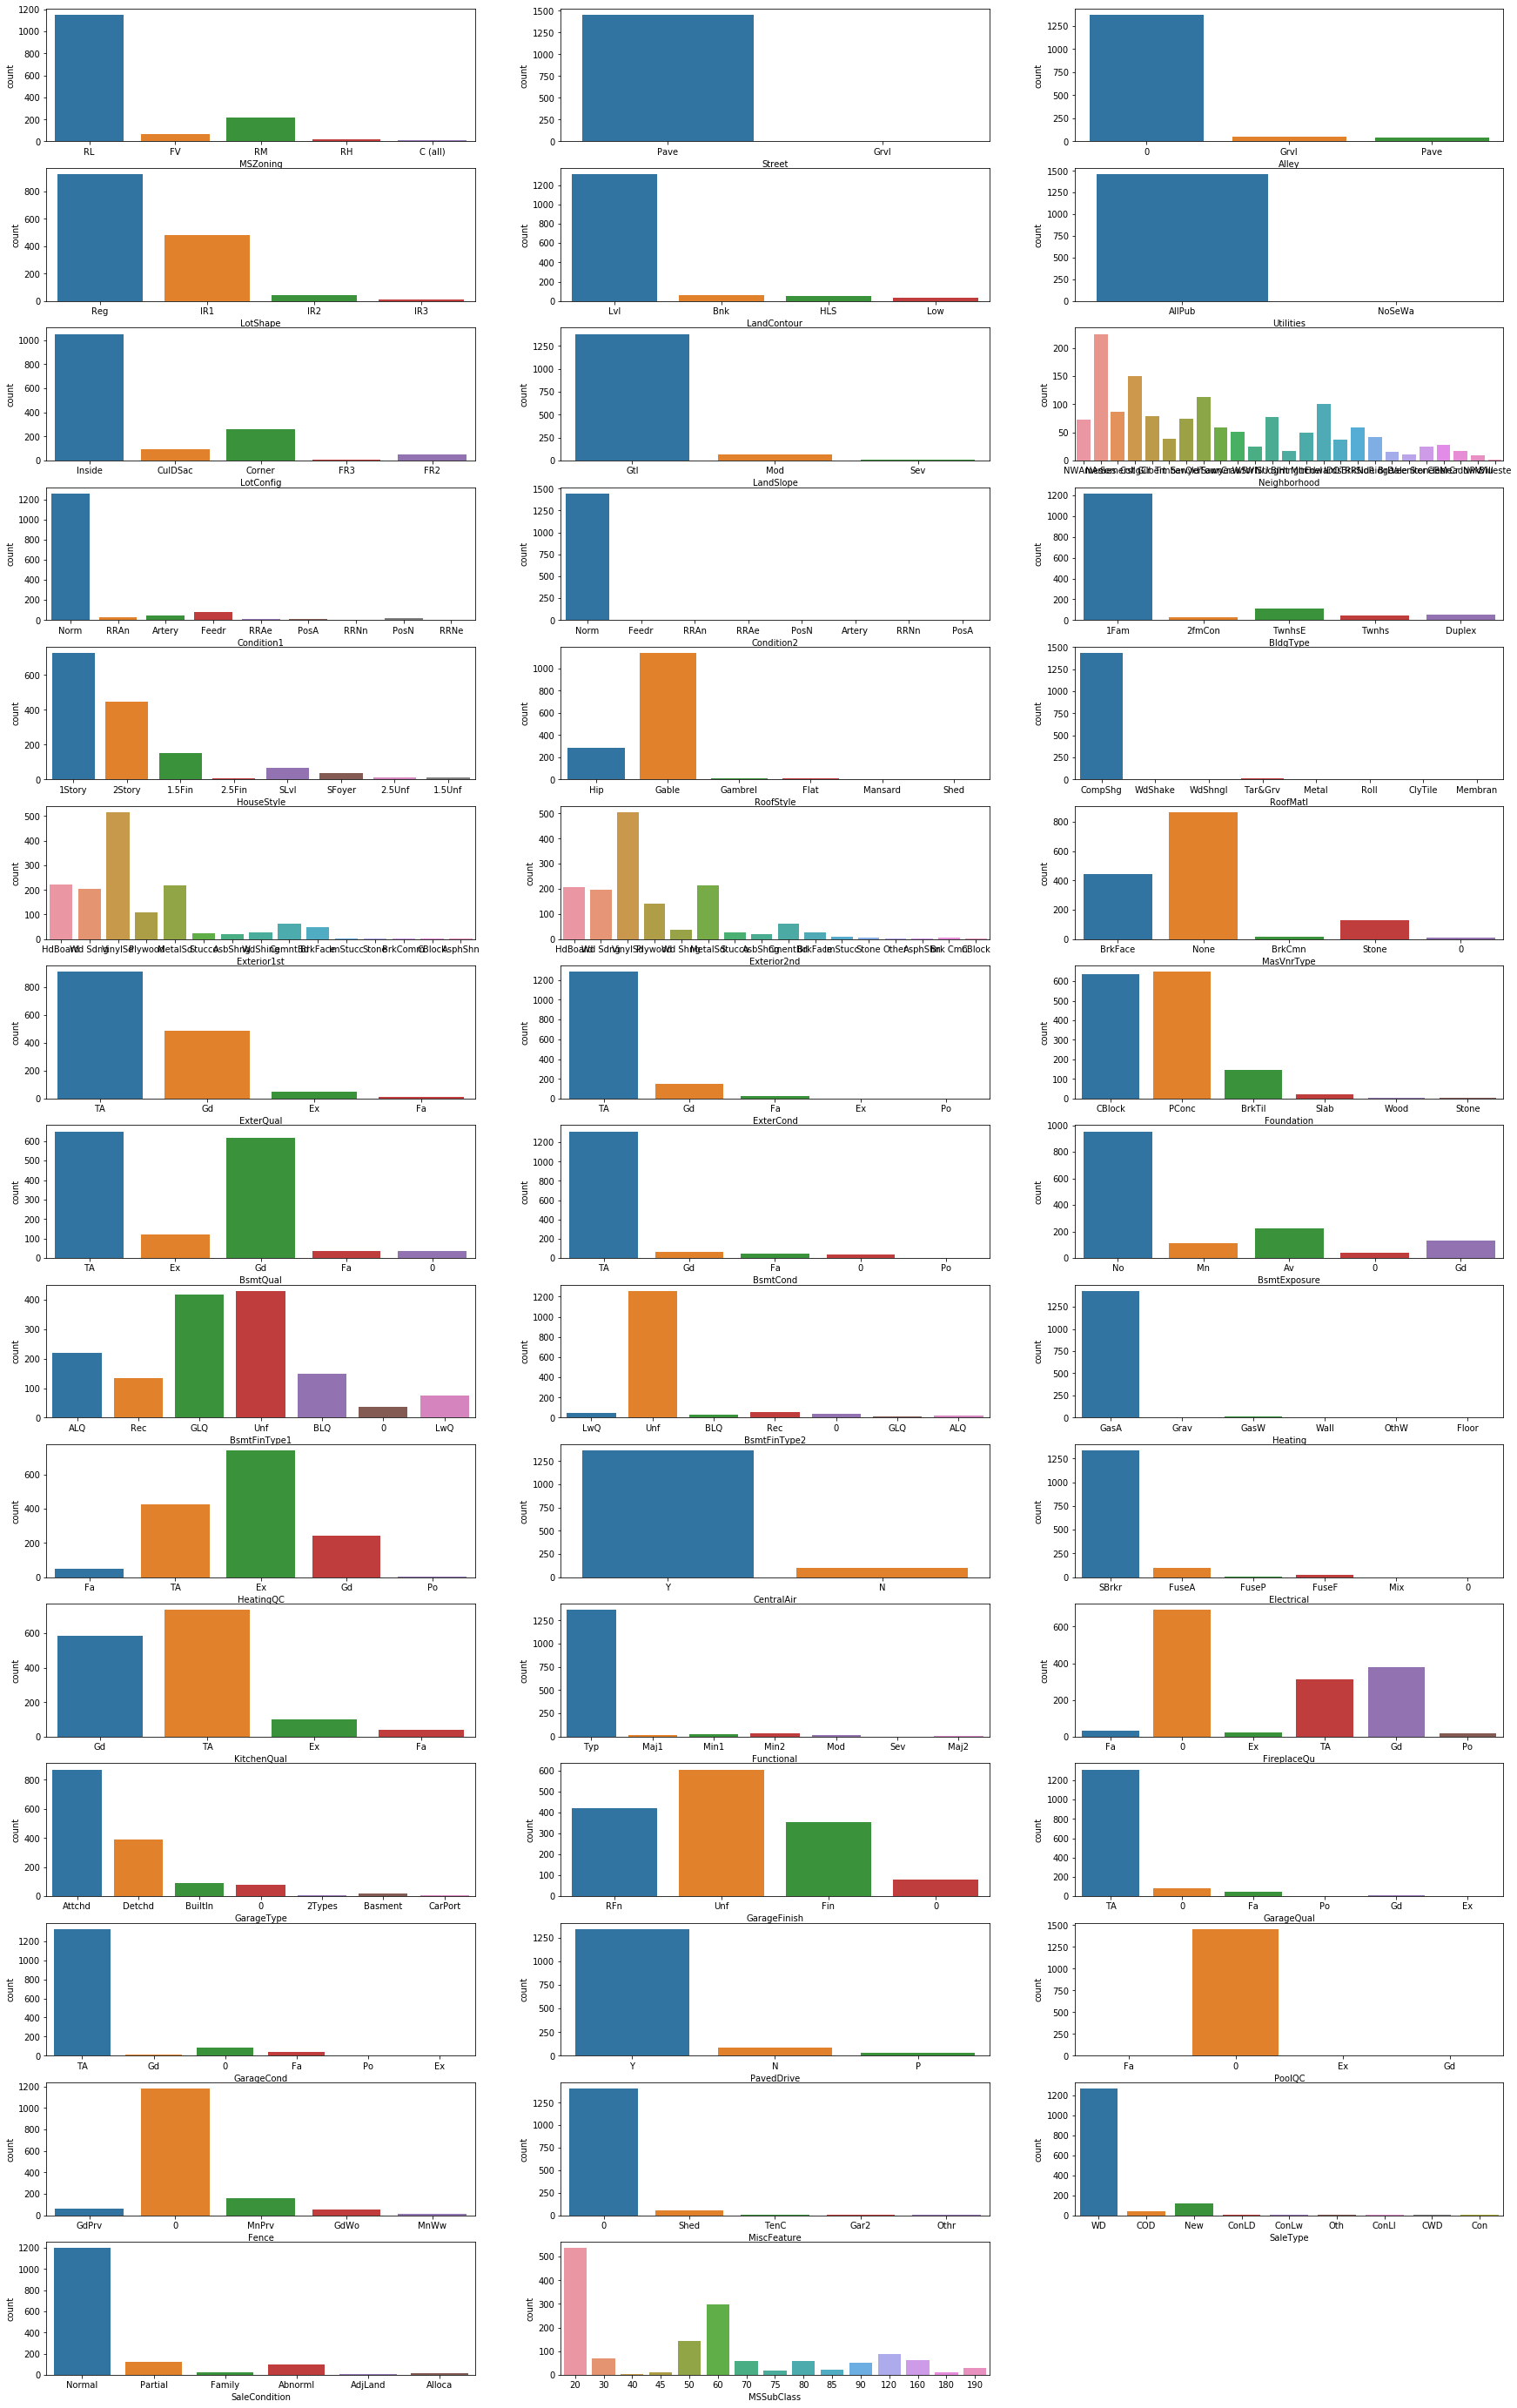

In [7]:
# Plot distribution of categorical data
fig1 = plt.figure(figsize=(30,50))
a = 0 #active plot number
for col in df.columns[:44]:
    a += 1
    ax = fig1.add_subplot(15,3,a)
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_xlabel(col)
       
fig1.savefig('./figures/distribution_plot.png')

In [11]:
df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    

In [13]:
# fot the columns with not enough variaty, specify as single_columns
# only one group showed high volumne of data, the other groups showed not enough data points to contribute to 
# variance of the the data
single_columns = ['Street', 'Alley','LandContour', 'Utilities','LandSlope','Condition1','Condition2',\
                 'RoofMatl','BsmtCond', 'BsmtFinType2','Heating','CentralAir','Electrical','Functional', \
                 'GarageFinish','GarageQual','GarageCond','PavedDrive','Fence', 'MiscFeature']

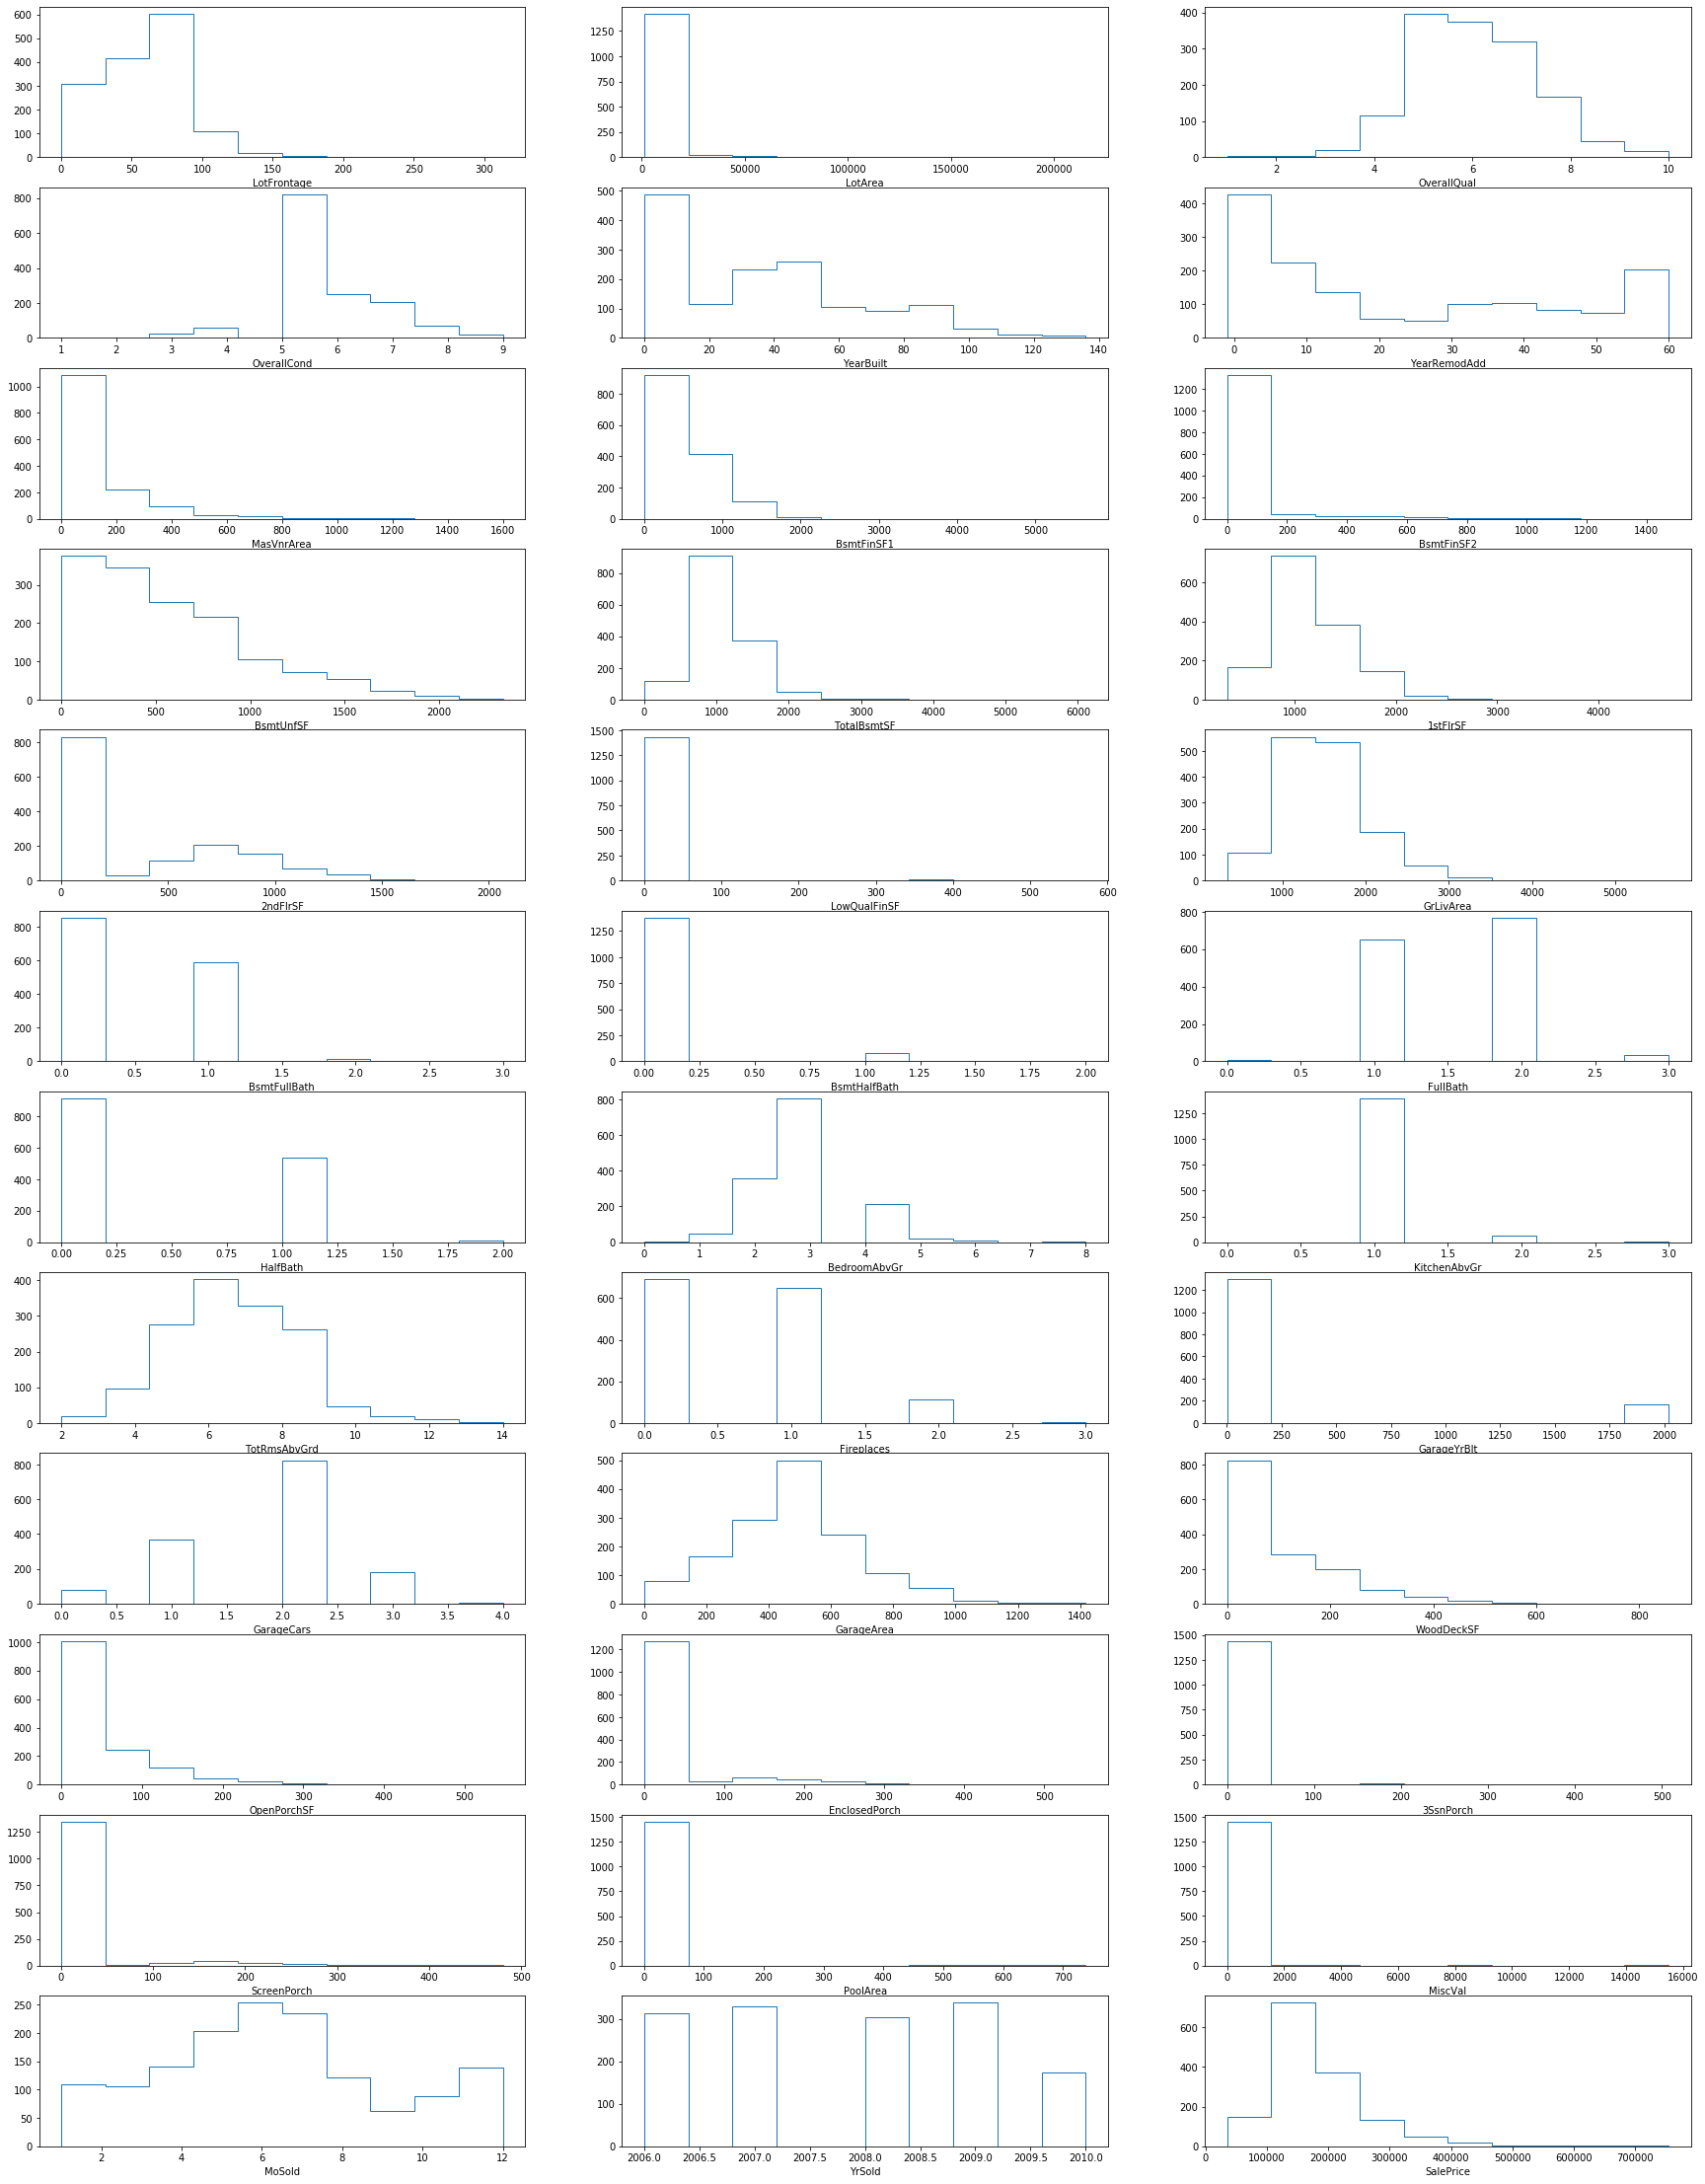

In [19]:
# Plot distribution of numeric data
fig2 = plt.figure(figsize=(30,50))
a = 0 #active plot number
for col in df.columns[44:]:
    a += 1
    ax = fig2.add_subplot(15,3,a)
    ax.hist(df[col], bins=10,histtype='step')
    ax.set_xlabel(col)
       
fig2.savefig('./figures/distribution_plot2.png')